<a href="https://colab.research.google.com/github/Ayush807/IBP_Assignment_2023/blob/main/IBP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [2]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-22 11:29:57--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-22 11:29:58--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  50.6MB/s    in 22s     

2023-05-22 11:30:21 (37.

In [3]:
#import module for connection to database
import sqlite3

In [4]:
#establish connection with database
conn = sqlite3.connect("enron.db")

In [5]:
#create cursor object
cur = conn.cursor()

In [6]:
#check schema of database
sql = """
SELECT name 
FROM sqlite_master
WHERE type = "table";
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [7]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [8]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [9]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [10]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [11]:
#Checking format of date field
sql = """
SELECT date
FROM message
"""

cur.execute(sql)
row = cur.fetchone()

print(row)

('2000-01-21 04:51:00',)


In [12]:
#using pandas library to read database
import pandas as pd

sql='''
SELECT * from message;
'''
# Load the data into a DataFrame
message_df = pd.read_sql_query(sql, conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [13]:
#checking the number of columns with missing values
message_df.isnull().sum()

mid           0
sender        0
date          0
message_id    0
subject       0
body          0
folder        0
dtype: int64

In [14]:
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mid         252759 non-null  int64 
 1   sender      252759 non-null  object
 2   date        252759 non-null  object
 3   message_id  252759 non-null  object
 4   subject     252759 non-null  object
 5   body        252759 non-null  object
 6   folder      252759 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


In [15]:
clean = message_df.dropna()
conn.commit()
clean


,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [16]:
sql = """
    SELECT DATE(date) AS Email_Date, Count(*) AS email_count
    FROM Message
    GROUP BY email_date
    ORDER BY email_date
"""

email_count = cur.fetchall()
email_count = pd.read_sql_query(sql, conn)
email_count

,Email_Date,email_count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


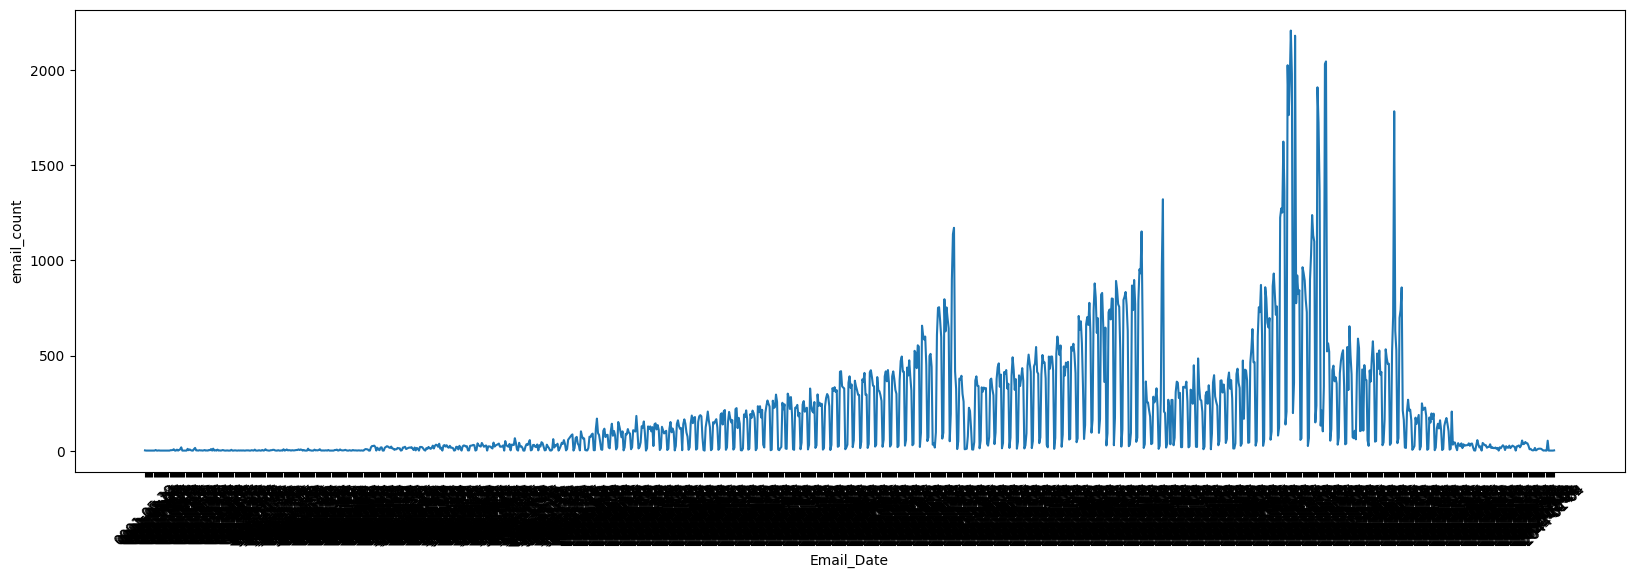

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot the line chart
plt.figure(figsize=(20, 6))

sns.lineplot(data=email_count, x='Email_Date', y='email_count')

plt.xticks(rotation=45)

# Display the plot
plt.show()


In [18]:
#check schema of table users using PRAGMA
sql = """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [19]:
sql='''
SELECT * from recipientinfo;
'''
# Load the data into a DataFrame
recipient_df = pd.read_sql_query(sql, conn)
recipient_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [40]:
sender_query = """
    SELECT Sender, COUNT(*) AS Send_Count
    FROM Message
    GROUP BY Sender
    ORDER BY Send_Count DESC
"""
sender_data = pd.read_sql_query(sender_query, conn)

recipient_query = """
    SELECT rvalue, COUNT(*) AS recipient_count
    FROM recipientinfo
    GROUP BY rvalue
    ORDER BY recipient_count DESC
"""

# Execute the recipient query and fetch the results into a DataFrame
recipient_data = pd.read_sql_query(recipient_query, conn)




In [21]:
sender_data

,sender,Send_Count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
...,...,...
17522,zoltan.trizna@ttmc.ttuhsc.edu,1
17523,zou.cherry@travelpark.com,1
17524,zrzic@mail.pt,1
17525,ztrizna@pol.net,1


In [41]:
recipient_data

,rvalue,recipient_count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
...,...,...
68079,zvon@enron.com,1
68080,zyft02@yahoo.com,1
68081,zyhorie.allyson@enron.com,1
68082,zykorie.allyson@enron.com,1


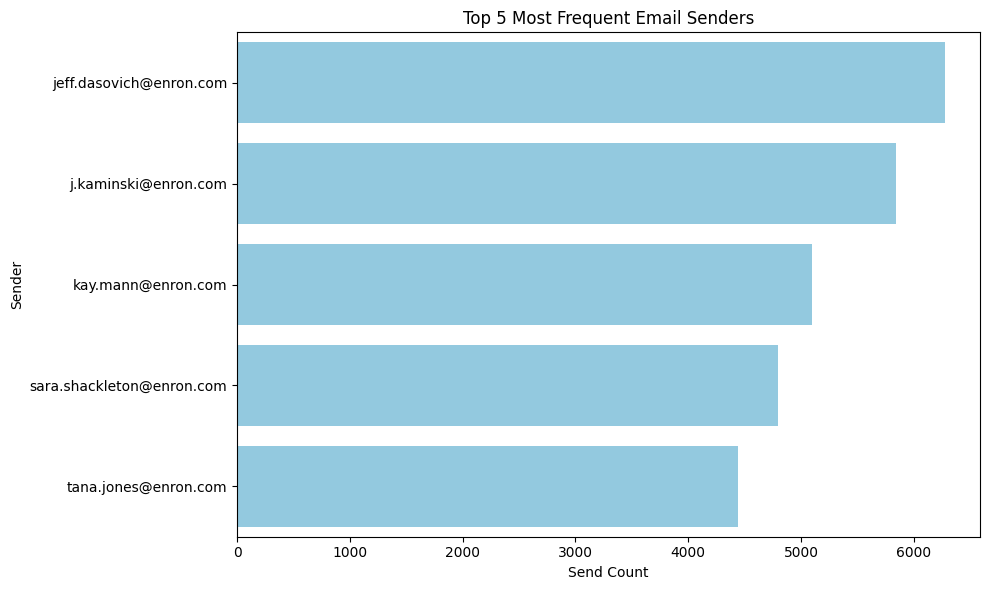

In [28]:
#Taking only top 5 values for senders
top_5_senders = sender_data.head(5)

# Plotting horizontal bar chart for top 5 senders
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_senders, y='sender', x='Send_Count', color='skyblue')
plt.xlabel('Send Count')
plt.ylabel('Sender')
plt.title('Top 5 Most Frequent Email Senders')
plt.tight_layout()
plt.show()

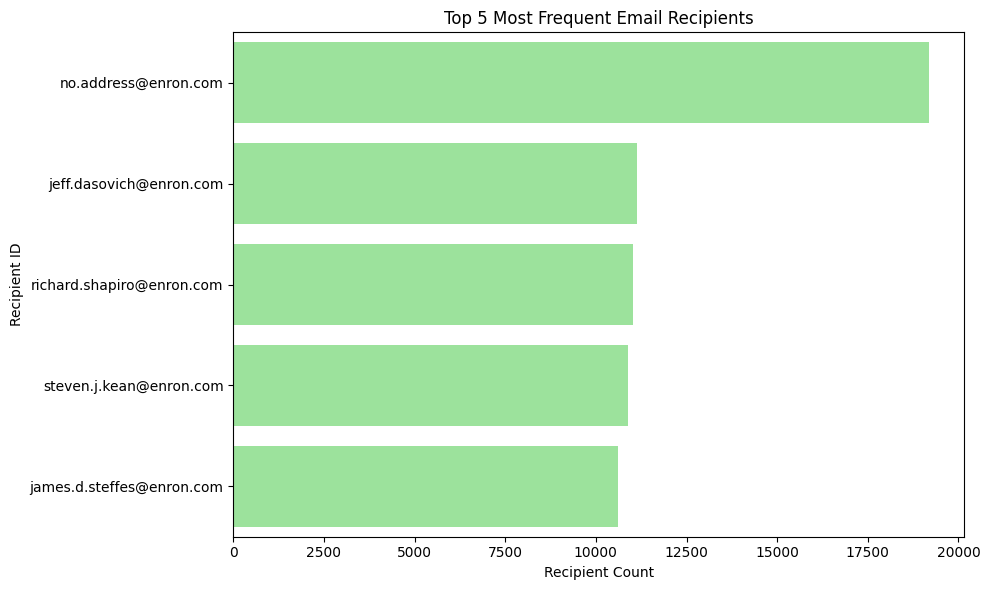

In [45]:
#Taking only top 5 values for recipients
top_5_recipients = recipient_data.head(5)

# Plotting horizontal bar chart for top 5 recipients
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_recipients, y='rvalue', x='recipient_count', color='lightgreen')
plt.xlabel('Recipient Count')
plt.ylabel('Recipient ID')
plt.title('Top 5 Most Frequent Email Recipients')
plt.tight_layout()
plt.show()


In [60]:
#Order the rtype values againt the count
type_query = """
    SELECT rtype, COUNT(*) AS Type_Count
    FROM recipientinfo
    GROUP BY rtype
    ORDER BY Type_Count DESC
"""
type_data = pd.read_sql_query(type_query, conn)
type_data

,rtype,Type_Count
0,TO,1556994
1,CC,253735
2,BCC,253713


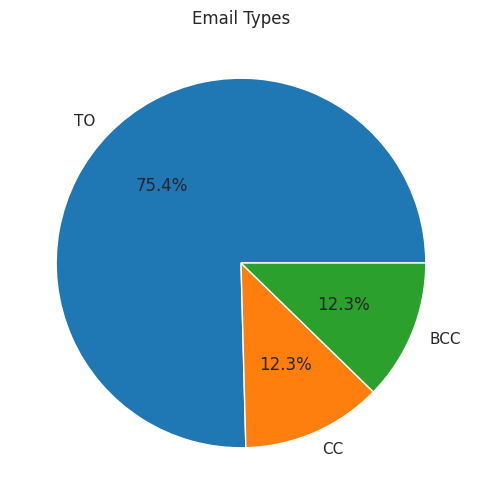

In [67]:
# Plot the pie chart
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.pie(data=type_data, x='Type_Count', labels='rtype',autopct='%.1f%%')
plt.title('Email Types')

# Show the plot
plt.show()